In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in asthma dataset
asthma = pd.read_csv('U.S._Chronic_Disease_Indicators__Asthma.csv')

/Users/jacqueline/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# clean asthma by dropping null data values, filtering by year, and filtering by the same DataValueType
asthma = asthma.dropna(subset=['DataValue'])
asthma = asthma[asthma['YearStart'] >=2011]
asthma = asthma[asthma['YearEnd'] <=2014]
asthma = asthma[asthma['DataValueType'] == 'Number']

In [4]:
# look at asthma data
asthma.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4,2014,2014,AZ,Arizona,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,4,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
6,2014,2014,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
8,2014,2014,HI,Hawaii,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,15,AST,AST4_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
9,2014,2014,HI,Hawaii,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,15,AST,AST2_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
10,2014,2014,IA,Iowa,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,19,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN


In [10]:
np.mean(asthma[asthma['Question'] == 'Asthma mortality rate']['DataValue'])

84.7011308562197

In [6]:
# load pm2.5 dataset
pm25 = pd.read_csv('Daily_Census_Tract-Level_PM2.5_Concentrations__2011-2014.csv')

In [7]:
# look at pm2.5 data
pm25.head()

,year,statefips,ds_pm_pred
0,2011,1,10.696324
1,2011,10,9.671609
2,2011,11,10.415272
3,2011,12,7.455682
4,2011,13,11.359919


In [8]:
# load state ids
states = pd.read_csv('stateids.tsv', sep='\t', header=None)

In [9]:
# rename columns
states = states.rename(columns={0:'name', 1:'abbr', 2:'id'})

In [10]:
# merge pm2.5 with state ids
pm25_with_state = pm25.merge(states, left_on='statefips', right_on='id')

In [11]:
# check to see that merge worked correctly
pm25_with_state

,year,statefips,ds_pm_pred,name,abbr,id
0,2011,1,10.696324,Alabama,AL,1
1,2012,1,10.396601,Alabama,AL,1
2,2013,1,10.039805,Alabama,AL,1
3,2014,1,11.007064,Alabama,AL,1
4,2011,10,9.671609,Delaware,DE,10
...,...,...,...,...,...,...
187,2014,8,6.674491,Colorado,CO,8
188,2011,9,9.284398,Connecticut,CT,9
189,2012,9,8.072119,Connecticut,CT,9
190,2013,9,8.406929,Connecticut,CT,9


In [12]:
# drop extra duplicate column
pm25_with_state = pm25_with_state.drop('statefips', axis=1)

In [13]:
len(asthma['LocationAbbr'][4])

2

In [14]:
len(pm25_with_state['abbr'][4])

3

In [15]:
# adjust asthma LocationAbbr column so it has same format as pm25_with_state abbr column
asthma['LocationAbbr'] = asthma['LocationAbbr'].str.ljust(3, ' ')

In [16]:
# merge asthma with pm2.5 data
asthma_pm25_merged = asthma.merge(pm25_with_state, left_on=['LocationAbbr', 'YearStart'], right_on=['abbr', 'year'])

In [17]:
# check to see merge worked
asthma_pm25_merged

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,year,ds_pm_pred,name,abbr,id
0,2014,2014,AZ,Arizona,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,GENM,NaN,NaN,NaN,NaN,2014,7.573242,Arizona,AZ,4
1,2014,2014,AZ,Arizona,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,API,NaN,NaN,NaN,NaN,2014,7.573242,Arizona,AZ,4
2,2014,2014,AZ,Arizona,SEDD; SID,Asthma,Emergency department visit rate for asthma,NaN,NaN,Number,...,HIS,NaN,NaN,NaN,NaN,2014,7.573242,Arizona,AZ,4
3,2014,2014,AZ,Arizona,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,GENF,NaN,NaN,NaN,NaN,2014,7.573242,Arizona,AZ,4
4,2014,2014,AZ,Arizona,NVSS,Asthma,Asthma mortality rate,NaN,NaN,Number,...,OVR,NaN,NaN,NaN,NaN,2014,7.573242,Arizona,AZ,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2014,2014,WV,West Virginia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,GENM,NaN,NaN,NaN,NaN,2014,9.486481,West Virginia,WV,54
1107,2014,2014,WV,West Virginia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,WHT,NaN,NaN,NaN,NaN,2014,9.486481,West Virginia,WV,54
1108,2014,2014,WV,West Virginia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,OVR,NaN,NaN,NaN,NaN,2014,9.486481,West Virginia,WV,54
1109,2014,2014,WV,West Virginia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,BLK,NaN,NaN,NaN,NaN,2014,9.486481,West Virginia,WV,54


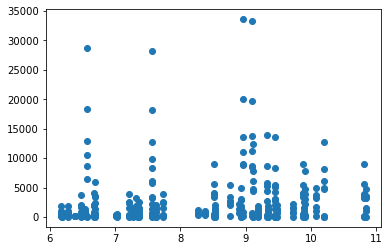

In [22]:
hospitalizations_only = asthma_pm25_merged[asthma_pm25_merged['Question'] == 'Hospitalizations for asthma']
plt.scatter(hospitalizations_only['ds_pm_pred'], hospitalizations_only['DataValue']);

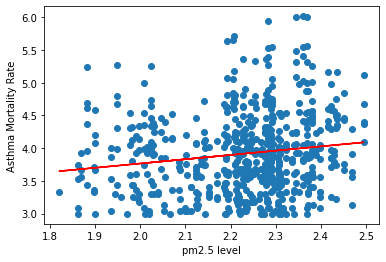

In [26]:
mortality_only = asthma_pm25_merged[asthma_pm25_merged['Question'] == 'Asthma mortality rate']

x = np.log(mortality_only['ds_pm_pred'])
y = np.log(mortality_only['DataValue'])
m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color = 'r')
plt.xlabel('log pm2.5 level')
plt.ylabel('Log Asthma Mortality Rate');

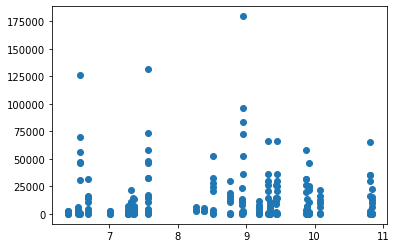

In [23]:
ER_rate_only = asthma_pm25_merged[asthma_pm25_merged['Question'] == 'Emergency department visit rate for asthma']
plt.scatter(ER_rate_only['ds_pm_pred'], ER_rate_only['DataValue'])